In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [5]:
# Load data
popcat_df = pd.read_csv('/Users/apple/Desktop/PG/Summer-24/Fintech/popcat-usd-max.csv')
doge_df = pd.read_csv('/Users/apple/Desktop/PG/Summer-24/Fintech/doge-usd-max.csv')



In [6]:
popcat_df.head()

,snapped_at,price,market_cap,total_volume
0,2023-12-19 00:00:00 UTC,0.012336,0.0,1.046065e+07
1,2023-12-20 00:00:00 UTC,0.012336,0.0,1.046065e+07
2,2023-12-21 00:00:00 UTC,0.016786,0.0,1.093758e+07
3,2023-12-22 00:00:00 UTC,0.031018,0.0,1.146686e+07
4,2023-12-23 00:00:00 UTC,0.035075,0.0,2.392332e+07


In [7]:
# Convert 'date' column to datetime
popcat_df['snapped_at'] = pd.to_datetime(popcat_df['snapped_at'])
doge_df['snapped_at'] = pd.to_datetime(doge_df['snapped_at'])

# Set 'date' as index
popcat_df.set_index('snapped_at', inplace=True)
doge_df.set_index('snapped_at', inplace=True)

# Extract relevant time periods
popcat_period = popcat_df.loc['2023-12-01':'2024-09-30']
doge_period = doge_df.loc['2020-09-01':'2021-12-31']

In [8]:
# Prepare data for LSTM model
def prepare_data(df, lookback=30):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[['price']])
    X, y = [], []
    for i in range(lookback, len(scaled_data)):
        X.append(scaled_data[i-lookback:i, 0])
        y.append(scaled_data[i, 0])
    return np.array(X), np.array(y), scaler

In [9]:
# Create and train LSTM model
def create_model(X_train):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Prepare POPCAT data
X, y, scaler = prepare_data(popcat_period)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [10]:
# Train model
model = create_model(X_train)
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

# Predict future prices
last_30_days = popcat_period['price'].values[-30:]
future_dates = pd.date_range(start='2024-10-01', end='2025-03-31', freq='D')
future_prices = []

for _ in range(len(future_dates)):
    next_pred = model.predict(last_30_days.reshape(1, 30, 1))
    future_prices.append(scaler.inverse_transform(next_pred)[0, 0])
    last_30_days = np.append(last_30_days[1:], next_pred)

future_df = pd.DataFrame({'snapped_at': future_dates, 'price': future_prices})
future_df.set_index('snapped_at', inplace=True)

2024-10-06 19:30:01.894035: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-10-06 19:30:01.894284: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-10-06 19:30:01.894766: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-10-06 19:30:01.895149: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-06 19:30:01.895483: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/apple/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/s

ConversionError: Failed to convert value(s) to axis units: array([Timestamp('2023-12-19 00:00:00+0000', tz='UTC'),
       Timestamp('2023-12-20 00:00:00+0000', tz='UTC'),
       Timestamp('2023-12-21 00:00:00+0000', tz='UTC'),
       Timestamp('2023-12-22 00:00:00+0000', tz='UTC'),
       Timestamp('2023-12-23 00:00:00+0000', tz='UTC'),
       Timestamp('2023-12-24 00:00:00+0000', tz='UTC'),
       Timestamp('2023-12-25 00:00:00+0000', tz='UTC'),
       Timestamp('2023-12-26 00:00:00+0000', tz='UTC'),
       Timestamp('2023-12-27 00:00:00+0000', tz='UTC'),
       Timestamp('2023-12-28 00:00:00+0000', tz='UTC'),
       Timestamp('2023-12-29 00:00:00+0000', tz='UTC'),
       Timestamp('2023-12-30 00:00:00+0000', tz='UTC'),
       Timestamp('2023-12-31 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-01 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-02 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-03 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-04 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-05 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-06 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-07 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-08 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-09 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-10 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-11 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-12 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-13 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-14 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-15 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-16 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-17 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-18 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-19 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-20 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-21 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-22 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-23 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-24 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-25 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-26 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-27 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-28 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-29 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-30 00:00:00+0000', tz='UTC'),
       Timestamp('2024-01-31 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-01 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-02 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-03 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-04 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-05 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-06 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-07 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-08 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-09 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-10 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-11 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-12 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-13 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-14 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-15 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-16 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-17 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-18 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-19 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-20 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-21 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-22 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-23 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-24 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-25 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-26 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-27 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-28 00:00:00+0000', tz='UTC'),
       Timestamp('2024-02-29 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-01 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-02 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-03 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-04 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-05 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-06 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-07 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-08 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-09 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-10 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-11 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-12 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-13 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-14 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-15 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-16 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-17 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-18 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-19 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-20 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-21 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-22 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-23 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-24 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-25 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-26 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-27 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-28 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-29 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-30 00:00:00+0000', tz='UTC'),
       Timestamp('2024-03-31 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-01 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-02 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-03 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-04 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-05 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-06 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-07 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-08 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-09 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-10 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-11 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-12 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-13 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-14 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-15 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-16 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-17 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-18 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-19 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-20 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-21 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-22 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-23 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-24 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-25 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-26 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-27 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-28 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-29 00:00:00+0000', tz='UTC'),
       Timestamp('2024-04-30 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-01 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-02 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-03 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-04 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-05 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-06 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-07 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-08 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-09 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-10 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-11 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-12 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-13 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-14 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-15 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-16 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-17 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-18 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-19 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-20 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-21 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-22 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-23 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-24 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-25 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-26 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-27 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-28 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-29 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-30 00:00:00+0000', tz='UTC'),
       Timestamp('2024-05-31 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-01 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-02 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-03 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-04 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-05 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-06 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-07 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-08 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-09 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-10 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-11 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-12 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-13 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-14 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-15 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-16 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-17 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-18 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-19 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-20 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-21 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-22 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-23 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-24 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-25 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-26 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-27 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-28 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-29 00:00:00+0000', tz='UTC'),
       Timestamp('2024-06-30 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-01 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-02 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-03 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-04 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-05 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-06 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-07 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-08 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-09 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-10 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-11 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-12 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-13 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-14 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-15 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-16 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-17 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-18 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-19 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-20 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-21 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-22 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-23 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-24 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-25 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-26 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-27 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-28 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-29 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-30 00:00:00+0000', tz='UTC'),
       Timestamp('2024-07-31 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-01 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-02 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-03 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-04 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-05 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-06 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-07 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-08 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-09 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-10 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-11 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-12 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-13 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-14 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-15 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-16 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-17 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-18 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-19 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-20 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-21 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-22 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-23 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-24 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-25 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-26 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-27 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-28 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-29 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-30 00:00:00+0000', tz='UTC'),
       Timestamp('2024-08-31 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-01 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-02 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-03 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-04 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-05 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-06 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-07 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-08 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-09 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-10 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-11 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-12 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-13 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-14 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-15 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-16 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-17 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-18 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-19 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-20 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-21 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-22 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-23 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-24 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-25 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-26 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-27 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-28 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-29 00:00:00+0000', tz='UTC'),
       Timestamp('2024-09-30 00:00:00+0000', tz='UTC'),
       Timestamp('2024-10-01 00:00:00'), Timestamp('2024-10-02 00:00:00'),
       Timestamp('2024-10-03 00:00:00'), Timestamp('2024-10-04 00:00:00'),
       Timestamp('2024-10-05 00:00:00'), Timestamp('2024-10-06 00:00:00'),
       Timestamp('2024-10-07 00:00:00'), Timestamp('2024-10-08 00:00:00'),
       Timestamp('2024-10-09 00:00:00'), Timestamp('2024-10-10 00:00:00'),
       Timestamp('2024-10-11 00:00:00'), Timestamp('2024-10-12 00:00:00'),
       Timestamp('2024-10-13 00:00:00'), Timestamp('2024-10-14 00:00:00'),
       Timestamp('2024-10-15 00:00:00'), Timestamp('2024-10-16 00:00:00'),
       Timestamp('2024-10-17 00:00:00'), Timestamp('2024-10-18 00:00:00'),
       Timestamp('2024-10-19 00:00:00'), Timestamp('2024-10-20 00:00:00'),
       Timestamp('2024-10-21 00:00:00'), Timestamp('2024-10-22 00:00:00'),
       Timestamp('2024-10-23 00:00:00'), Timestamp('2024-10-24 00:00:00'),
       Timestamp('2024-10-25 00:00:00'), Timestamp('2024-10-26 00:00:00'),
       Timestamp('2024-10-27 00:00:00'), Timestamp('2024-10-28 00:00:00'),
       Timestamp('2024-10-29 00:00:00'), Timestamp('2024-10-30 00:00:00'),
       Timestamp('2024-10-31 00:00:00'), Timestamp('2024-11-01 00:00:00'),
       Timestamp('2024-11-02 00:00:00'), Timestamp('2024-11-03 00:00:00'),
       Timestamp('2024-11-04 00:00:00'), Timestamp('2024-11-05 00:00:00'),
       Timestamp('2024-11-06 00:00:00'), Timestamp('2024-11-07 00:00:00'),
       Timestamp('2024-11-08 00:00:00'), Timestamp('2024-11-09 00:00:00'),
       Timestamp('2024-11-10 00:00:00'), Timestamp('2024-11-11 00:00:00'),
       Timestamp('2024-11-12 00:00:00'), Timestamp('2024-11-13 00:00:00'),
       Timestamp('2024-11-14 00:00:00'), Timestamp('2024-11-15 00:00:00'),
       Timestamp('2024-11-16 00:00:00'), Timestamp('2024-11-17 00:00:00'),
       Timestamp('2024-11-18 00:00:00'), Timestamp('2024-11-19 00:00:00'),
       Timestamp('2024-11-20 00:00:00'), Timestamp('2024-11-21 00:00:00'),
       Timestamp('2024-11-22 00:00:00'), Timestamp('2024-11-23 00:00:00'),
       Timestamp('2024-11-24 00:00:00'), Timestamp('2024-11-25 00:00:00'),
       Timestamp('2024-11-26 00:00:00'), Timestamp('2024-11-27 00:00:00'),
       Timestamp('2024-11-28 00:00:00'), Timestamp('2024-11-29 00:00:00'),
       Timestamp('2024-11-30 00:00:00'), Timestamp('2024-12-01 00:00:00'),
       Timestamp('2024-12-02 00:00:00'), Timestamp('2024-12-03 00:00:00'),
       Timestamp('2024-12-04 00:00:00'), Timestamp('2024-12-05 00:00:00'),
       Timestamp('2024-12-06 00:00:00'), Timestamp('2024-12-07 00:00:00'),
       Timestamp('2024-12-08 00:00:00'), Timestamp('2024-12-09 00:00:00'),
       Timestamp('2024-12-10 00:00:00'), Timestamp('2024-12-11 00:00:00'),
       Timestamp('2024-12-12 00:00:00'), Timestamp('2024-12-13 00:00:00'),
       Timestamp('2024-12-14 00:00:00'), Timestamp('2024-12-15 00:00:00'),
       Timestamp('2024-12-16 00:00:00'), Timestamp('2024-12-17 00:00:00'),
       Timestamp('2024-12-18 00:00:00'), Timestamp('2024-12-19 00:00:00'),
       Timestamp('2024-12-20 00:00:00'), Timestamp('2024-12-21 00:00:00'),
       Timestamp('2024-12-22 00:00:00'), Timestamp('2024-12-23 00:00:00'),
       Timestamp('2024-12-24 00:00:00'), Timestamp('2024-12-25 00:00:00'),
       Timestamp('2024-12-26 00:00:00'), Timestamp('2024-12-27 00:00:00'),
       Timestamp('2024-12-28 00:00:00'), Timestamp('2024-12-29 00:00:00'),
       Timestamp('2024-12-30 00:00:00'), Timestamp('2024-12-31 00:00:00'),
       Timestamp('2025-01-01 00:00:00'), Timestamp('2025-01-02 00:00:00'),
       Timestamp('2025-01-03 00:00:00'), Timestamp('2025-01-04 00:00:00'),
       Timestamp('2025-01-05 00:00:00'), Timestamp('2025-01-06 00:00:00'),
       Timestamp('2025-01-07 00:00:00'), Timestamp('2025-01-08 00:00:00'),
       Timestamp('2025-01-09 00:00:00'), Timestamp('2025-01-10 00:00:00'),
       Timestamp('2025-01-11 00:00:00'), Timestamp('2025-01-12 00:00:00'),
       Timestamp('2025-01-13 00:00:00'), Timestamp('2025-01-14 00:00:00'),
       Timestamp('2025-01-15 00:00:00'), Timestamp('2025-01-16 00:00:00'),
       Timestamp('2025-01-17 00:00:00'), Timestamp('2025-01-18 00:00:00'),
       Timestamp('2025-01-19 00:00:00'), Timestamp('2025-01-20 00:00:00'),
       Timestamp('2025-01-21 00:00:00'), Timestamp('2025-01-22 00:00:00'),
       Timestamp('2025-01-23 00:00:00'), Timestamp('2025-01-24 00:00:00'),
       Timestamp('2025-01-25 00:00:00'), Timestamp('2025-01-26 00:00:00'),
       Timestamp('2025-01-27 00:00:00'), Timestamp('2025-01-28 00:00:00'),
       Timestamp('2025-01-29 00:00:00'), Timestamp('2025-01-30 00:00:00'),
       Timestamp('2025-01-31 00:00:00'), Timestamp('2025-02-01 00:00:00'),
       Timestamp('2025-02-02 00:00:00'), Timestamp('2025-02-03 00:00:00'),
       Timestamp('2025-02-04 00:00:00'), Timestamp('2025-02-05 00:00:00'),
       Timestamp('2025-02-06 00:00:00'), Timestamp('2025-02-07 00:00:00'),
       Timestamp('2025-02-08 00:00:00'), Timestamp('2025-02-09 00:00:00'),
       Timestamp('2025-02-10 00:00:00'), Timestamp('2025-02-11 00:00:00'),
       Timestamp('2025-02-12 00:00:00'), Timestamp('2025-02-13 00:00:00'),
       Timestamp('2025-02-14 00:00:00'), Timestamp('2025-02-15 00:00:00'),
       Timestamp('2025-02-16 00:00:00'), Timestamp('2025-02-17 00:00:00'),
       Timestamp('2025-02-18 00:00:00'), Timestamp('2025-02-19 00:00:00'),
       Timestamp('2025-02-20 00:00:00'), Timestamp('2025-02-21 00:00:00'),
       Timestamp('2025-02-22 00:00:00'), Timestamp('2025-02-23 00:00:00'),
       Timestamp('2025-02-24 00:00:00'), Timestamp('2025-02-25 00:00:00'),
       Timestamp('2025-02-26 00:00:00'), Timestamp('2025-02-27 00:00:00'),
       Timestamp('2025-02-28 00:00:00'), Timestamp('2025-03-01 00:00:00'),
       Timestamp('2025-03-02 00:00:00'), Timestamp('2025-03-03 00:00:00'),
       Timestamp('2025-03-04 00:00:00'), Timestamp('2025-03-05 00:00:00'),
       Timestamp('2025-03-06 00:00:00'), Timestamp('2025-03-07 00:00:00'),
       Timestamp('2025-03-08 00:00:00'), Timestamp('2025-03-09 00:00:00'),
       Timestamp('2025-03-10 00:00:00'), Timestamp('2025-03-11 00:00:00'),
       Timestamp('2025-03-12 00:00:00'), Timestamp('2025-03-13 00:00:00'),
       Timestamp('2025-03-14 00:00:00'), Timestamp('2025-03-15 00:00:00'),
       Timestamp('2025-03-16 00:00:00'), Timestamp('2025-03-17 00:00:00'),
       Timestamp('2025-03-18 00:00:00'), Timestamp('2025-03-19 00:00:00'),
       Timestamp('2025-03-20 00:00:00'), Timestamp('2025-03-21 00:00:00'),
       Timestamp('2025-03-22 00:00:00'), Timestamp('2025-03-23 00:00:00'),
       Timestamp('2025-03-24 00:00:00'), Timestamp('2025-03-25 00:00:00'),
       Timestamp('2025-03-26 00:00:00'), Timestamp('2025-03-27 00:00:00'),
       Timestamp('2025-03-28 00:00:00'), Timestamp('2025-03-29 00:00:00'),
       Timestamp('2025-03-30 00:00:00'), Timestamp('2025-03-31 00:00:00')],
      dtype=object)

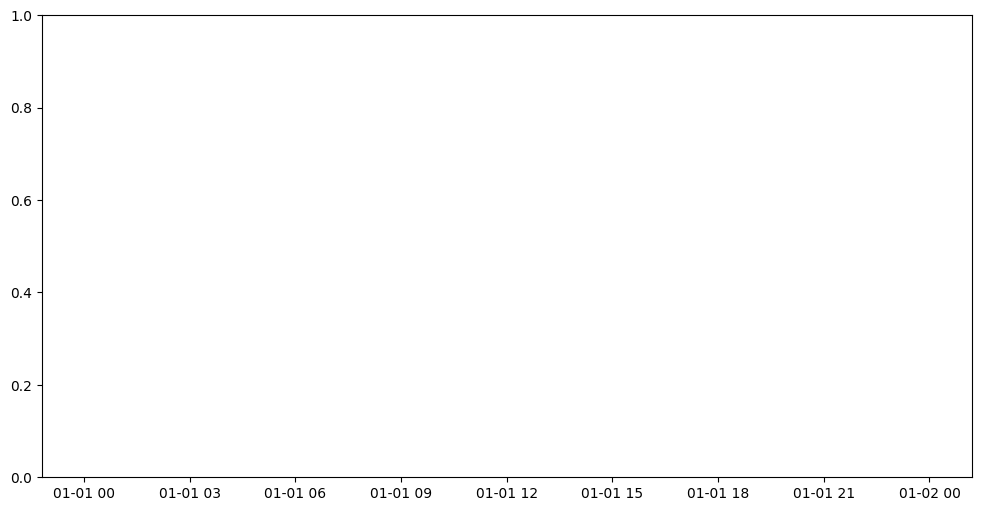

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.dates as mdates

# Ensure all dates are datetime objects
popcat_period.index = pd.to_datetime(popcat_period.index)
doge_period.index = pd.to_datetime(doge_period.index)
future_df.index = pd.to_datetime(future_df.index)

# Combine historical and predicted data
popcat_full = pd.concat([popcat_period, future_df])

# Visualize comparison
plt.figure(figsize=(12, 6))
plt.plot(popcat_full.index, popcat_full['price'], label='POPCAT')
plt.plot(doge_period.index, doge_period['price'], label='DOGE')
plt.title('POPCAT vs DOGE Price Comparison')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

# Format x-axis to show dates nicely
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gcf().autofmt_xdate()  # Rotation and alignment of tick labels

plt.tight_layout()
plt.show()

# Calculate percentage change
popcat_change = (popcat_full['price'].iloc[-1] - popcat_full['price'].iloc[0]) / popcat_full['price'].iloc[0] * 100
doge_change = (doge_period['price'].iloc[-1] - doge_period['price'].iloc[0]) / doge_period['price'].iloc[0] * 100

print(f"POPCAT price change: {popcat_change:.2f}%")
print(f"DOGE price change: {doge_change:.2f}%")

In [12]:
# Calculate percentage change
popcat_change = (popcat_full['price'][-1] - popcat_full['price'][0]) / popcat_full['price'][0] * 100
doge_change = (doge_period['price'][-1] - doge_period['price'][0]) / doge_period['price'][0] * 100

print(f"POPCAT price change: {popcat_change:.2f}%")
print(f"DOGE price change: {doge_change:.2f}%")

POPCAT price change: 39177557750015746867408792453120.00%
DOGE price change: 5235.76%


/var/folders/6v/nknkg2bs2438nctmyz9q_9v80000gn/T/ipykernel_21421/4128078578.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  popcat_change = (popcat_full['price'][-1] - popcat_full['price'][0]) / popcat_full['price'][0] * 100
/var/folders/6v/nknkg2bs2438nctmyz9q_9v80000gn/T/ipykernel_21421/4128078578.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  doge_change = (doge_period['price'][-1] - doge_period['price'][0]) / doge_period['price'][0] * 100
